In [1]:
# tensorflow, tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# helper 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 패션 MNIST 데이터 로드
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 출력을 위해, 클래스 이름 선언
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 훈련 데이터 확인
train_images.shape

(60000, 28, 28)

In [4]:
len(train_images)

60000

In [5]:
train_labels
print(train_labels[0])

9


In [6]:
# 테스트 데이터 확인
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

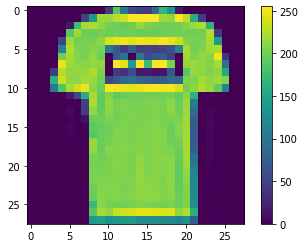

In [8]:
# 데이터 이미지 확인
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# 데이터 전처리
train_images = train_images / 255.0

test_images = test_images / 255.0

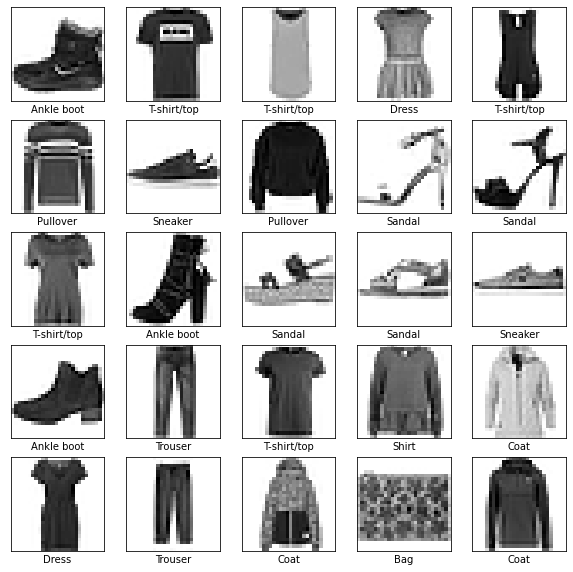

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# 모델 설계
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# keras.layers.Flatten : 2차원 이미지 정보를 1차원 배열 변환
# keras.layers.Dense : densely-connected/fully-connected 노드(뉴런)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 125,962
Trainable params: 125,962
Non-trai

In [12]:
# 훈련 설정
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# 학습
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8127 - accuracy: 0.7227
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4894 - accuracy: 0.8275
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4339 - accuracy: 0.8466
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4017 - accuracy: 0.8565
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3791 - accuracy: 0.8650
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3600 - accuracy: 0.8708
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8740
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3339 - accuracy: 0.8798
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3232 - accuracy: 0.8816
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.314

In [14]:
# 정확도 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3650 - accuracy: 0.8695 - 728ms/epoch - 2ms/step

테스트 정확도: 0.8694999814033508


In [15]:
#훈련된 모델활용한 예측
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [16]:
#예측 결과
predictions[0]

array([4.0302635e-05, 1.2565265e-05, 3.2255764e-05, 4.0779931e-05,
       8.7954857e-07, 3.0011008e-02, 1.7932562e-04, 5.6817655e-02,
       6.5650572e-03, 9.0630025e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
# 각 클래스에 대한 예측을 표시하기 위한 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

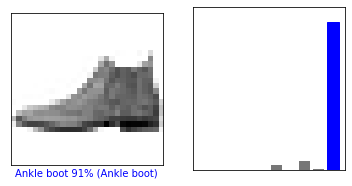

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

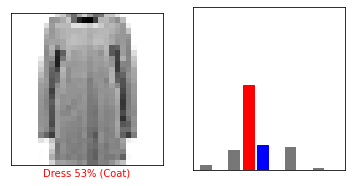

In [21]:
i = 150
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

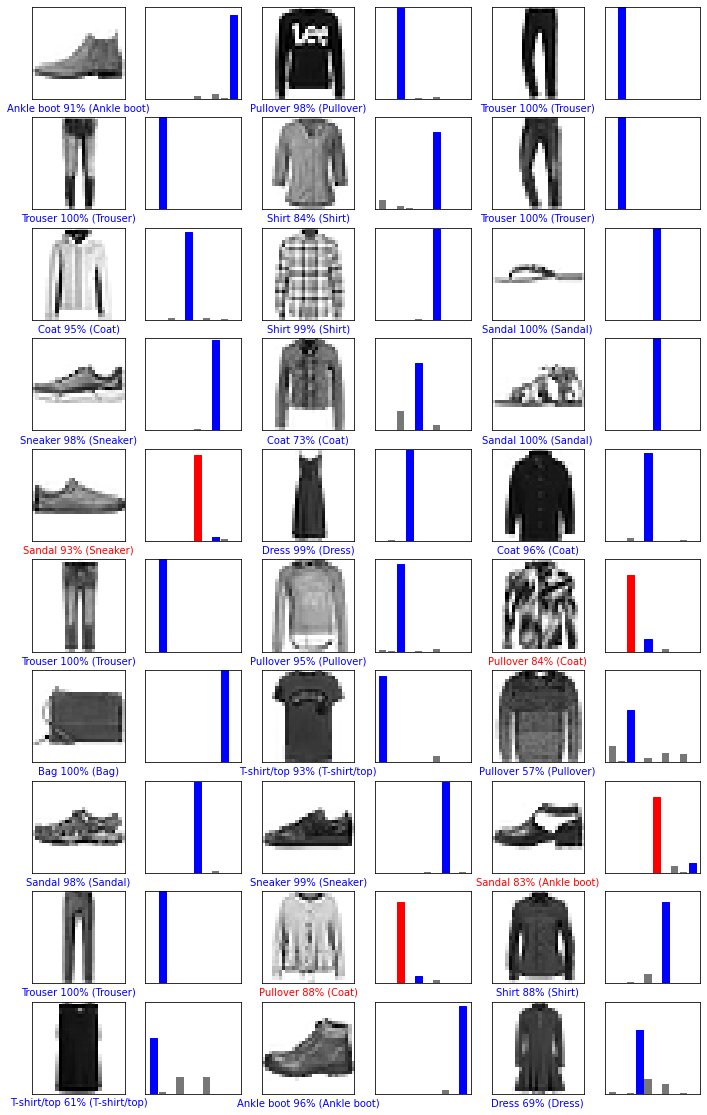

In [22]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [23]:
# 이미지로 테스트
img = test_images[0]; img = (np.expand_dims(img,0))
#img = test_images[0:3]
print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[4.0302602e-05 1.2565254e-05 3.2255735e-05 4.0779854e-05 8.7954868e-07
  3.0010954e-02 1.7932564e-04 5.6817625e-02 6.5650512e-03 9.0630031e-01]]


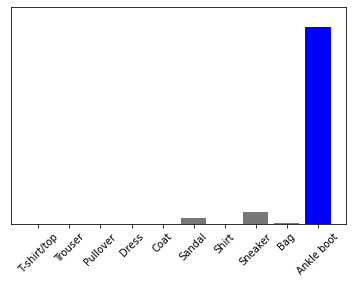

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

9

In [ ]:
# CNN 모델
model2 = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.Conv2D(128, (3, 3), activation='relu'),
    #keras.layers.MaxPooling2D((2, 2)),
    #keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.summary()

In [29]:
from google.colab import drive
drive.mount('/content/drive')

import os
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/cpkt_fashion_mnist/cp--{epoch:04d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0,
                                                 save_freq='epoch',
                                                 )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# 학습과정 설정
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습 및 평가
train_images2 = train_images.reshape((60000, 28, 28, 1))
test_images2 = test_images.reshape((10000, 28, 28, 1))
#train_images, test_images = train_images / 255.0, test_images / 255.0


history = model2.fit(train_images2, train_labels, epochs=10, validation_split=0.2, callbacks=[cp_callback])
#model.evaluate(test_images, test_labels)

Epoch 1/10
1500/1500 [==============================] - 14s 5ms/step - loss: 0.6526 - accuracy: 0.7617 - val_loss: 0.4898 - val_accuracy: 0.8202
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4320 - accuracy: 0.8440 - val_loss: 0.4047 - val_accuracy: 0.8528
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3654 - accuracy: 0.8669 - val_loss: 0.3721 - val_accuracy: 0.8635
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3255 - accuracy: 0.8809 - val_loss: 0.3567 - val_accuracy: 0.8692
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2992 - accuracy: 0.8914 - val_loss: 0.3181 - val_accuracy: 0.8838
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2742 - accuracy: 0.8992 - val_loss: 0.3120 - val_accuracy: 0.8881
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2511 - accuracy: 0.9080 - val_loss: 0.3205 - val_accuracy

In [31]:
model2.load_weights('/content/drive/MyDrive/Colab Notebooks/cpkt_fashion_mnist/cp--0001.ckpt')

# 정확도 평가
test_loss, test_acc = model2.evaluate(test_images2,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.5099 - accuracy: 0.8157 - 923ms/epoch - 3ms/step

테스트 정확도: 0.8156999945640564


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

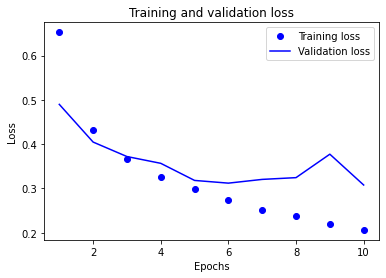

In [33]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# bo: 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss')
# b : 파란 실선
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

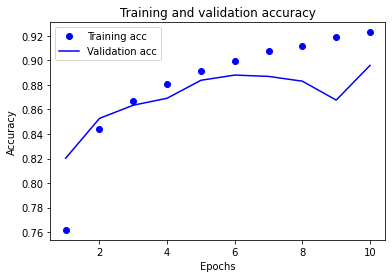

In [34]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()